## Question 2 - Basic Bidding Strategies

### Import Libraries

In [64]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import MultiLabelBinarizer
from random import randrange

pd.set_option('display.max_columns', 999)
pd.set_option("display.max_rows",999)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
def memory(df):
    print("Memory usage of the dataframe is {:.2f} MB".format(
        df.memory_usage().sum() / 1024**2))

In [3]:
convert = True
path = 'C:/Users/User/OneDrive/UCL/term_2/git/maai_bid_strategy'

if(convert):
    val_df = pd.read_csv(path+'/we_data/validation.csv')
    val_df.to_hdf('validation.h5', 'validation')
    
else:
    val_df = pd.read_hdf('validation.h5', 'validation')
    
memory(val_df)

Memory usage of the dataframe is 57.97 MB


In [4]:
val_df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,trqRTvFRLpscFU,5ede68cc7542a34777fb8a1574856b6f,NaN,mm_10027070_2459574_9659312,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,trqRTu1YP5scFsf,cff326604db401e7d4f895fd747f7e91,NaN,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,trqRTv14MqTR1m58uG,93f242f025dc7d424c4ba7002b177df7,NaN,2996225656,300,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,trqRTvdJMoFoFoc4JKn,40c388f45dbc0e1fc53a8c6c81305de5,NaN,3481684581,336,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,tKFJeun0BouoXOl4JKTI,fcf53e0e5f09aa8d7e1c9d986cea321,NaN,1120607322,200,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


### Part 1 - Constant Bidding

In [ ]:
for price_paid, click in val_df[['payprice','click']].values:
    if cost >= budget:
        break
    print(price_paid)

In [56]:
def constant_bids(const_bid):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000  ## Given budget of 6,250 CNY Fen
        
    for price_paid, click in val_df[['payprice','click']].values:
            if price_paid < budget and const_bid >= price_paid:
                impression += 1
                clicks += click
                cost += price_paid
                budget = budget - price_paid
    return impression, clicks, cost

In [74]:
%%time
min_bid = np.min(val_df["payprice"].values)
max_bid = np.max(val_df["payprice"].values)

# print("Minimum Bid is:", min_bid)
# print("Maximum Bid is:", max_bid)

bid_range = np.arange(min_bid+2, max_bid+2, 2) # determines the range that bids should be in

const_df = pd.DataFrame()
const_df['constant_bids'] = bid_range

impression_list = []
clicks_list = []
cost_list = []
for i in bid_range:
    [impressions, clicks, costs] = constant_bids(i)
    impression_list.append(impressions)
    clicks_list.append(clicks)
    cost_list.append(costs)

cost_list = [x / 1000 for x in cost_list]
const_df['impression_won'] = impression_list
const_df['impression_won'] = const_df.impression_won.astype(int)
const_df['total_spend'] = cost_list
const_df['clicks'] = clicks_list
const_df['ctr'] = (const_df['clicks']/const_df['impression_won'] * 100).round(4).astype(str)
const_df['cpm'] = (const_df['total_spend']/const_df['impression_won'] * 1000).round(2).astype(str)
const_df['cpc'] = (const_df['total_spend']/const_df['clicks']).round(2).astype(str)

Wall time: 54.1 s


In [58]:
const_df

,constant_bids,impression_won,total_spend,clicks,ctr,cpm,cpc
0,2,851,1.247,0,0.0,1.47,inf
1,4,2176,6.455,0,0.0,2.97,inf
2,6,9624,45.486,4,0.0416,4.73,11.37
3,8,12373,65.999,4,0.0323,5.33,16.5
4,10,16434,105.274,4,0.0243,6.41,26.32
5,12,20368,150.373,5,0.0245,7.38,30.07
6,14,23489,192.564,5,0.0213,8.2,38.51
7,16,27238,250.979,8,0.0294,9.21,31.37
8,18,31880,332.140,10,0.0314,10.42,33.21
9,20,47162,636.129,13,0.0276,13.49,48.93


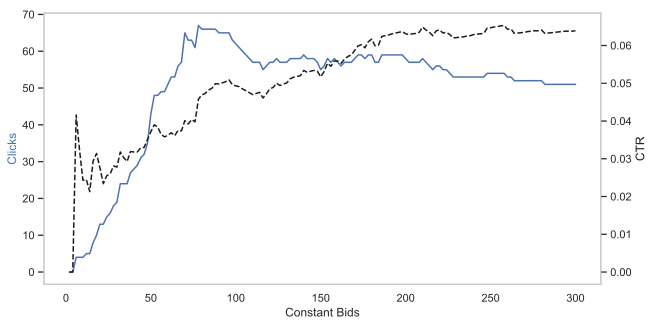

In [75]:
clicks_df = const_df[['clicks','constant_bids']]
ctr_df = const_df[['constant_bids','ctr']]

clicks_df = clicks_df.astype(float)
ctr_df = ctr_df.astype(float)

fig, ax1 = plt.subplots()
ax1.plot(clicks_df['constant_bids'],clicks_df['clicks'])
ax1.set_xlabel('Constant Bids')
ax1.set_ylabel('Clicks', color='b')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(ctr_df['constant_bids'], ctr_df['ctr'],color='k',linestyle='--')
ax2.set_ylabel('CTR', color='k')
ax2.grid(False)
fig.set_size_inches(10, 5)

# fig.savefig('constant.PNG', dpi=200)

plt.show()

In [76]:
winning_bid = const_df.iloc[np.where(const_df['clicks'] == const_df['clicks'].max())[0]]
winning_bid

,constant_bids,impression_won,total_spend,clicks,ctr,cpm,cpc
38,78,146338,6249.999,67,0.0458,42.71,93.28


In [31]:
winning_bid = const_df.iloc[np.where(const_df['clicks'] == const_df['clicks'].max())[0]]
winning_bid

,constant_bids,impression_won,total_spend,clicks,ctr,cpm,cpc
38,78,146864,6249.992,68,0.0463,42.56,91.91
39,80,145916,6249.957,68,0.0466,42.83,91.91


#### Comments :

### Part 2 - Random Bidding

In [66]:
def random_bids(u_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000  ## Given budget of 6,250 CNY Fen

    for price_paid, click in val_df[['payprice','click']].values:
        rand_bid = randrange(u_bound)
        if price_paid < budget and rand_bid >= price_paid:
            impression += 1
            clicks += click
            cost += price_paid
            budget = budget - price_paid
    return impression, clicks, cost

In [68]:
rand_df = pd.DataFrame()
rand_df['upper_bound'] = bid_range

impression_list = []
clicks_list = []
cost_list = []
for i in bid_range:
    [impressions, clicks, costs] = random_bids(i)
    impression_list.append(impressions)
    clicks_list.append(clicks)
    cost_list.append(costs)

cost_list = [x / 1000 for x in cost_list]
rand_df['impression_won'] = impression_list
rand_df['impression_won'] = rand_df.impression_won.astype(int)
rand_df['total_spend'] = cost_list
rand_df['clicks'] = clicks_list
rand_df['ctr'] = (rand_df['clicks']/rand_df['impression_won'] * 100).round(4).astype(str)
rand_df['cpm'] = (rand_df['total_spend']/rand_df['impression_won'] * 1000).round(2).astype(str)
rand_df['cpc'] = (rand_df['total_spend']/rand_df['clicks']).round(2).astype(str)

In [69]:
rand_df

,upper_bound,impression_won,total_spend,clicks,ctr,cpm,cpc
0,2,224,0.142,0,0.0,0.63,inf
1,4,582,0.812,0,0.0,1.4,inf
2,6,2092,7.596,0,0.0,3.63,inf
3,8,4185,18.437,0,0.0,4.41,inf
4,10,5881,28.743,2,0.034,4.89,14.37
5,12,7902,43.997,3,0.038,5.57,14.67
6,14,9808,60.812,2,0.0204,6.2,30.41
7,16,11446,77.509,3,0.0262,6.77,25.84
8,18,13441,99.911,4,0.0298,7.43,24.98
9,20,15345,124.805,6,0.0391,8.13,20.8


In [77]:
upper_bound = rand_df.iloc[np.where(rand_df['clicks'] == rand_df['clicks'].max())[0]]
upper_bound

,upper_bound,impression_won,total_spend,clicks,ctr,cpm,cpc
65,132,145838,6214.671,76,0.0521,42.61,81.77


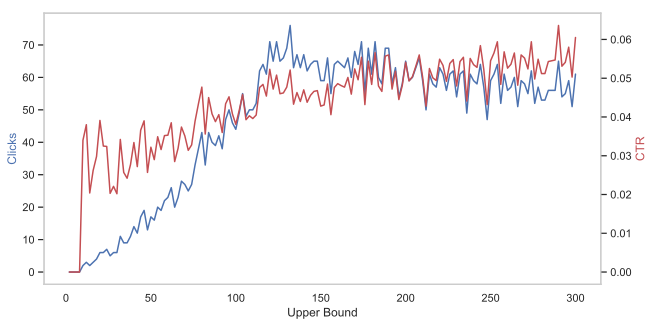

In [78]:
clicks_df = rand_df[['clicks','upper_bound']]
ctr_df = rand_df[['upper_bound','ctr']]

clicks_df = clicks_df.astype(float)
ctr_df = ctr_df.astype(float)

fig, ax1 = plt.subplots()
ax1.plot(clicks_df['upper_bound'],clicks_df['clicks'])
ax1.set_xlabel('Upper Bound')
ax1.set_ylabel('Clicks', color='b')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(ctr_df['upper_bound'], ctr_df['ctr'],color='r')
ax2.set_ylabel('CTR', color='r')
ax2.grid(False)
fig.set_size_inches(10, 5)

# fig.savefig('constant.PNG', dpi=200)

plt.show()